## GATHERING BUSSINESS FROM WOMEN'S CLOTHING E-COMMERCE DATASET

### BY IRFAN SEPTIYANA PUTRA

## Bussiness understanding

1. Which ages range that describe customers age in selected e-commerce?
2. Are there any correlation between rating and the most frequent bought products?
3. What features that correlate with recommended indicator?

### PRELIMINARY WRANGLING

> This dataset contain data from women's activity in clothing e-commerce. Included several features in this dataset such as clothing id, buyer's age, review title and body, rating, reccomedation indicator, Positiv feedback count, product's division name, department name and class name.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [244]:
# read data from csv
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [245]:
# data shape
df.shape

(23486, 11)

In [246]:
# finding info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


all datatypes are in proper state, but the name of all column must be changed with '_' as separator. Seeing from info above there is column that only indicate numbers of row which is not needed. There will be features that will have a lot of variances which will not use in this data exploration such as title and review text. 

In [247]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [248]:
df[df['Positive Feedback Count'] == 122]['Review Text']

7218    I loved the lace detailing all over this dress...
Name: Review Text, dtype: object

### Data Assesment

### Quality

1. Change space in column name into underscore
2. Drop unnecessesary features such as Unnamed:0, Text and Review Text

### Tidy

No Note

### Data Cleaning

In [249]:
# copy dataframe
df_c = df.copy()

### Quality

`1. Change space in column name into underscore`

### Define

For making it easier to access column value in pandas, space in all column names must be change with underscore

### Code

In [250]:
df_c.columns = df_c.columns.str.replace(' ','_')

### Test

In [251]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed:_0                 23486 non-null int64
Clothing_ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review_Text                22641 non-null object
Rating                     23486 non-null int64
Recommended_IND            23486 non-null int64
Positive_Feedback_Count    23486 non-null int64
Division_Name              23472 non-null object
Department_Name            23472 non-null object
Class_Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


`2. Drop unnecessesary features such as Unnamed:0, Text and Review Text`

### Define

Drop Unnamed:0, Text and Review Text columns

### Code

In [252]:
# drop first column, Title and Review Text
df_c = df_c.drop([df_c.columns[0], df_c.columns[3], df_c.columns[4]], axis = 1)

### Test

In [253]:
df_c.head()

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,4,1,0,Initmates,Intimate,Intimates
1,1080,34,5,1,4,General,Dresses,Dresses
2,1077,60,3,0,0,General,Dresses,Dresses
3,1049,50,5,1,0,General Petite,Bottoms,Pants
4,847,47,5,1,6,General,Tops,Blouses


## Data Exploration to Answer Questions

In [254]:
# data ready for exploration
df_cle = df_c.copy()

In [255]:
# make new column that contain age range of users
cut_bin = [17, 24, 30, 36, 42, 48, 54, 60, 66, 99]
df_cle['Age_Range'] = pd.cut(df_cle['Age'], bins=cut_bin)
df_cle.head(10)

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Age_Range
0,767,33,4,1,0,Initmates,Intimate,Intimates,"(30, 36]"
1,1080,34,5,1,4,General,Dresses,Dresses,"(30, 36]"
2,1077,60,3,0,0,General,Dresses,Dresses,"(54, 60]"
3,1049,50,5,1,0,General Petite,Bottoms,Pants,"(48, 54]"
4,847,47,5,1,6,General,Tops,Blouses,"(42, 48]"
5,1080,49,2,0,4,General,Dresses,Dresses,"(48, 54]"
6,858,39,5,1,1,General Petite,Tops,Knits,"(36, 42]"
7,858,39,4,1,4,General Petite,Tops,Knits,"(36, 42]"
8,1077,24,5,1,0,General,Dresses,Dresses,"(17, 24]"
9,1077,34,5,1,0,General,Dresses,Dresses,"(30, 36]"


### Question 1 : What are the most age range users in selected e-commerce?

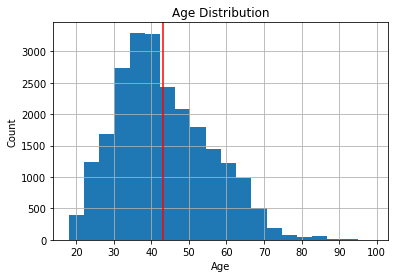

In [256]:
# histogram of age
df_cle.Age.hist(bins=20);
plt.title('Age Distribution');
plt.xlabel('Age');
plt.ylabel('Count');
plt.axvline(df_cle.Age.mean(), color = 'red');

In General, mean of customers age is around 43 years old and it has skew right distribution. For getting more detail in customer age range, I will categorized customers age in some intervals.

In [257]:
# count age range in dataset in percentage
percent_age = df_cle.Age_Range.value_counts()/df.shape[0]*100
percent_age

(36, 42]    20.539896
(30, 36]    19.075194
(42, 48]    15.447501
(48, 54]    11.402538
(24, 30]    10.414715
(54, 60]     8.945755
(60, 66]     6.612450
(17, 24]     3.798007
(66, 99]     3.763944
Name: Age_Range, dtype: float64

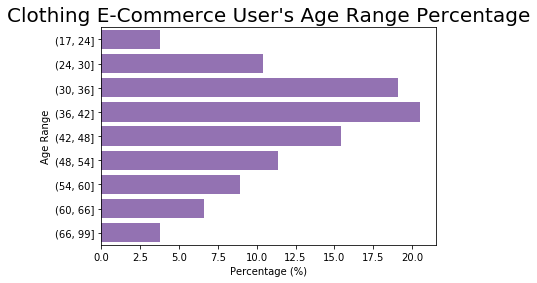

In [258]:
# visualize percentage age range
base_col = sb.color_palette()[4]
sb.barplot(x = percent_age.values, y = percent_age.index, color = base_col);
plt.title("Clothing E-Commerce User's Age Range Percentage", fontsize = 20);
plt.xlabel('Percentage (%)');
plt.ylabel('Age Range');

In [259]:
# Calculation percentages of user's in range 24 - 60 uears old
percent_age.values[1:7].sum()

71.89815209060718

About 71.89% of e-commerce users are in range 24 - 60 years old. The top three age range's are 36-42 year's old (20.53%), 30-36 year's old (19.07%) and 42-48 year's old (15.45%) 

### Question 2 : Are there any correlation between rating and the most frequent buy products?

In [260]:
# Finding most frequnt bought products by grouping in department
cat_depart = df_cle.Department_Name.value_counts()

depart_df = pd.DataFrame()
depart_df['Department'] = cat_depart.index
depart_df['Counts'] = cat_depart.values

# rating average for each department name
cat_rat = df_cle.groupby('Department_Name').Rating.mean()
depart_rate_df = pd.DataFrame()
depart_rate_df['Department'] = cat_rat.index
depart_rate_df['Rating'] = cat_rat.values

depart_df = depart_df.join(depart_rate_df.set_index('Department'), on='Department')
depart_df = depart_df.sort_values(by = ['Counts'], ascending = False)

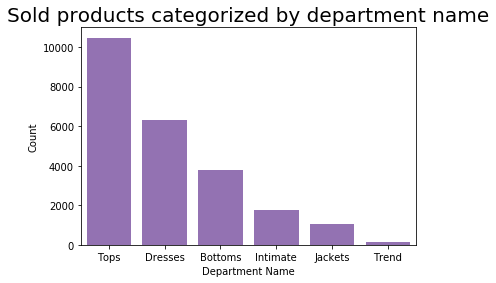

In [261]:
# visualize sold product based on Department name
base_col = sb.color_palette()[4]
sb.barplot(x = depart_df.Department, y = depart_df.Counts, color = base_col);
plt.title("Sold products categorized by department name", fontsize = 20);
plt.ylabel('Count');
plt.xlabel('Department Name');

The most sold products are Tops with more than 10.000 times bought, followed by Dresses and Bottoms.

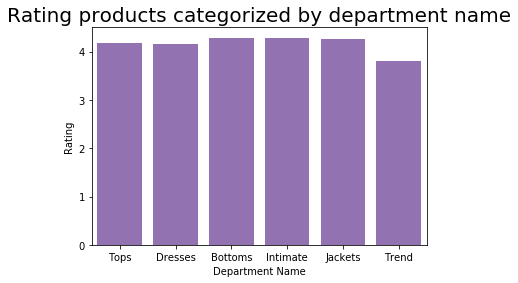

In [262]:
# rating average for each department name
cat_rat = df_cle.groupby('Department_Name').Rating.mean()

# visualize rating of sold product based on Department name
sb.barplot(x = depart_df.Department, y = depart_df.Rating, color = base_col);
plt.title("Rating products categorized by department name", fontsize = 20);
plt.ylabel('Rating');
plt.xlabel('Department Name');

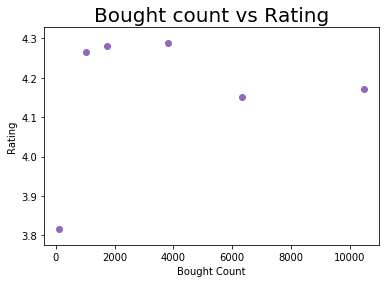

In [263]:
# visualize rating of sold product based on Department name
plt.scatter(x = depart_df.Counts, y = depart_df.Rating, color = base_col);
plt.title("Bought count vs Rating", fontsize = 20);
plt.ylabel('Rating');
plt.xlabel('Bought Count');

From both graph above, Rating is not depending on department name. Rating in all department names are similar in around 4. Further exploration is needed to see does most bought products categorized by class name correlate with rating.

In [264]:
df_cle.Clothing_ID.nunique()

1206

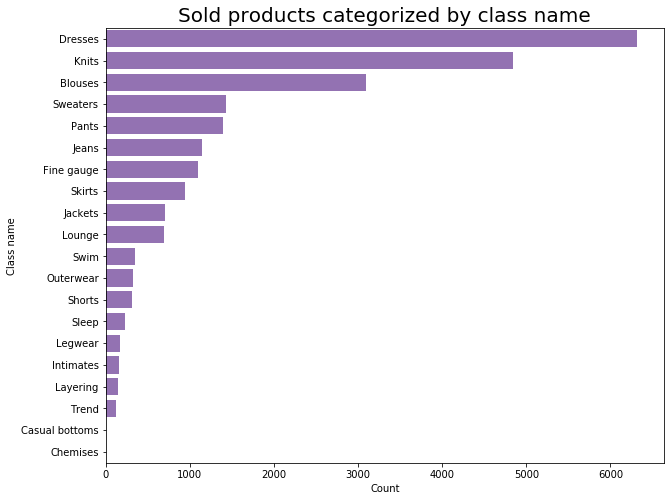

In [265]:
# Finding most frequnt bought products by grouping in class
cat_class = df_cle.Class_Name.value_counts()

class_df = pd.DataFrame()
class_df['Class'] = cat_class.index
class_df['Counts'] = cat_class.values

# Rating products categorized by class name
cat_class_rat = df_cle.groupby('Class_Name').Rating.mean()

class_rate_df = pd.DataFrame()
class_rate_df['Class'] = cat_class_rat.index
class_rate_df['Rating'] = cat_class_rat.values

class_df = class_df.join(class_rate_df.set_index('Class'), on='Class')
class_df = class_df.sort_values(by = ['Counts'], ascending = False)

# visualize percentage age range
plt.figure(figsize=[10,8])
sb.barplot(x = class_df.Counts, y = class_df.Class, color = base_col);
plt.title("Sold products categorized by class name", fontsize = 20);
plt.xlabel('Count');
plt.ylabel('Class name');

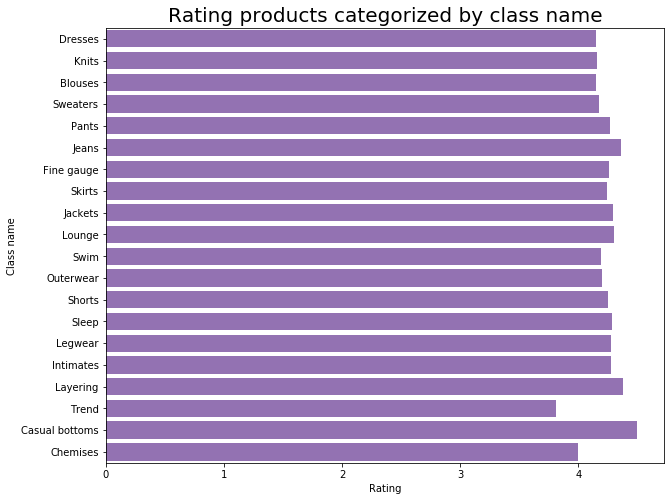

In [266]:
# visualize percentage age range
plt.figure(figsize=[10,8])
sb.barplot(x = class_df.Rating, y = class_df.Class, color = base_col);
plt.title("Rating products categorized by class name", fontsize = 20);
plt.xlabel('Rating');
plt.ylabel('Class name');

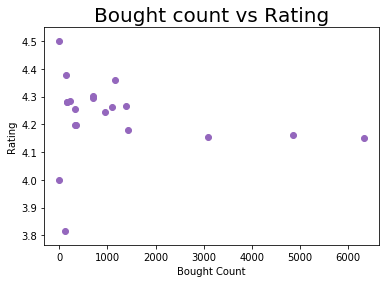

In [267]:
# visualize rating of sold product based on Department name
plt.scatter(x = class_df.Counts, y = class_df.Rating, color = base_col);
plt.title("Bought count vs Rating", fontsize = 20);
plt.ylabel('Rating');
plt.xlabel('Bought Count');

It seems that there are no tendencies of rating value based on both Departmen and Class name. Products rating average that categorized in department and class name almost similar. Maybe there are any correlation between most bought products and rating.

In [268]:
# count sold product by clothing ID
sold_pro = df_cle.Clothing_ID.value_counts()

# make a new dataframe
products_df = pd.DataFrame()
products_df['Clothing_ID'] = sold_pro.index
products_df['Counts'] = sold_pro.values

# count product's rating by clothing ID
rate_pro = df_cle.groupby('Clothing_ID').Rating.mean()
rate_df = pd.DataFrame()
rate_df['Clothing_ID'] = rate_pro.index
rate_df['Rating'] = rate_pro.values

# merge both dataframe above
pro_rate_df = products_df.join(rate_df.set_index('Clothing_ID'), on='Clothing_ID')
pro_rate_df.head()

,Clothing_ID,Counts,Rating
0,1078,1024,4.204102
1,862,806,4.200993
2,1094,756,4.189153
3,1081,582,4.281787
4,872,545,4.383486


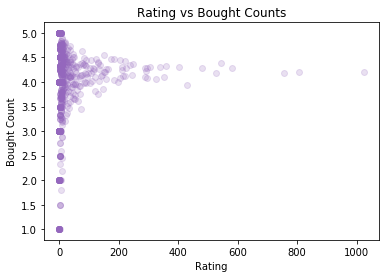

In [274]:
# Visualisation Rating vs Bought Counts
plt.scatter(pro_rate_df.Counts, pro_rate_df.Rating, color = base_col, alpha = 0.2);
plt.title('Rating vs Bought Counts');
plt.xlabel('Rating');
plt.ylabel('Bought Count');

In [150]:
pro_rate_df.corr()

,Clothing_ID,Counts,Rating
Clothing_ID,1.000000,0.255940,-0.081286
Counts,0.255940,1.000000,-0.000834
Rating,-0.081286,-0.000834,1.000000


There are no correlation between frequency of product bought and its rating. That statement is gotten from data visualization on Rating vs Bought Count. It shown above that,average products rating are not increasing when the product is more frequently bought by customers. And it statements become more bold when correlation calculation between Counts and Rating only resulting -0.081 which is indicate that there are no correlation between both variables.

### Question 3 : What features that correlate with recommended indicator?

In [191]:
df_cle.head(30)

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Age_Range
0,767,33,4,1,0,Initmates,Intimate,Intimates,"(30, 36]"
1,1080,34,5,1,4,General,Dresses,Dresses,"(30, 36]"
2,1077,60,3,0,0,General,Dresses,Dresses,"(54, 60]"
3,1049,50,5,1,0,General Petite,Bottoms,Pants,"(48, 54]"
4,847,47,5,1,6,General,Tops,Blouses,"(42, 48]"
5,1080,49,2,0,4,General,Dresses,Dresses,"(48, 54]"
6,858,39,5,1,1,General Petite,Tops,Knits,"(36, 42]"
7,858,39,4,1,4,General Petite,Tops,Knits,"(36, 42]"
8,1077,24,5,1,0,General,Dresses,Dresses,"(18, 24]"
9,1077,34,5,1,0,General,Dresses,Dresses,"(30, 36]"


From seeing data head in a glance, Rating and Positive feedback are correlate with Recommended indicator

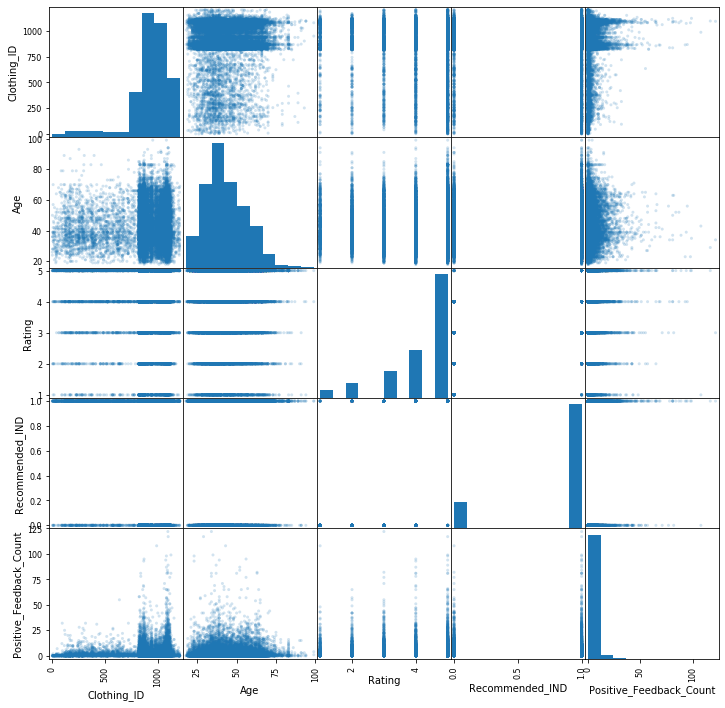

In [241]:
pd.plotting.scatter_matrix(df_cle, figsize = (12,12), alpha = 0.2);

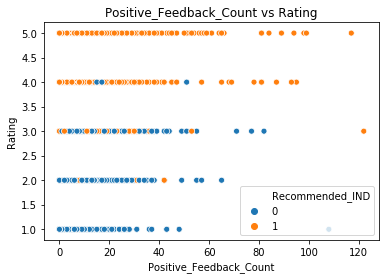

In [206]:
sb.scatterplot(x = df_cle.Positive_Feedback_Count, y = df_cle.Rating, hue = df_cle.Recommended_IND);
plt.title('Positive_Feedback_Count vs Rating');

In [194]:
df_cle.corr()

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count
Clothing_ID,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended_IND,-0.016206,0.030622,0.792336,1.000000,-0.069045
Positive_Feedback_Count,0.046356,0.043079,-0.064961,-0.069045,1.000000


Seeing from scatter plot and correlation value calculation result, Positive_Feedback_Count has almost no correlation with Recommended_IND due to its small value. In the other hand, Rating gives big impact to Recommended_IND. Based on this condition we can make Recommended_IND predictor using machine learning.

In [235]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [216]:
# drop null value
df_ml = df_cle.dropna(subset=['Division_Name'], how='any')
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 9 columns):
Clothing_ID                23472 non-null int64
Age                        23472 non-null int64
Rating                     23472 non-null int64
Recommended_IND            23472 non-null int64
Positive_Feedback_Count    23472 non-null int64
Division_Name              23472 non-null object
Department_Name            23472 non-null object
Class_Name                 23472 non-null object
Age_Range                  23472 non-null category
dtypes: category(1), int64(5), object(3)
memory usage: 1.6+ MB


In [220]:
df_ml['int'] = 1

C:\ProgramData\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [221]:
df_ml.head()

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Age_Range,int
0,767,33,4,1,0,Initmates,Intimate,Intimates,"(30, 36]",1
1,1080,34,5,1,4,General,Dresses,Dresses,"(30, 36]",1
2,1077,60,3,0,0,General,Dresses,Dresses,"(54, 60]",1
3,1049,50,5,1,0,General Petite,Bottoms,Pants,"(48, 54]",1
4,847,47,5,1,6,General,Tops,Blouses,"(42, 48]",1


In [222]:
# make label and features
X = df_ml[['Rating', 'int']]
y = df_ml.Recommended_IND

In [238]:
# make procedure to train and test model
def train_test_model(X, y, test_size = 0.2):
    '''
    This procedure makes predictor based on SVM.
    
    Input parameter
    X : Features Input model
    y : Label of model
    test_size : test size proportion over dataset
    
    return
    clf : classifier model based on SVM
    train_conf : confusion matrix for training process
    test_conf : confusion matrix for test process
    rep_train : performance for training process
    rep_test : performance for test process
    
    '''
    
    # split data into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
    
    # make and fitting predictor
    clf = SVC(kernel = 'linear')
    clf.fit(X_train, y_train)
    
    # predict value
    predicted_train = clf.predict(X_train)
    predicted_test = clf.predict(X_test)
    
    # f1 score calculation
    rep_train = classification_report(y_train, predicted_train, labels = [0,1])
    rep_test = classification_report(y_test, predicted_test, labels = [0,1])
    
    train_conf = confusion_matrix(y_train, predicted_train)
    test_conf = confusion_matrix(y_test, predicted_test)

    return clf, train_conf, test_conf, rep_train, rep_test

In [240]:
model, train_conf, test_conf, rep_train, rep_test = train_test_model(X,y)

# print result
print('training confusion matrix')
print(train_conf)
print('test confusion matrix')
print(test_conf)
print('training classification report')
print(rep_train)
print('test classification report')
print(rep_test)

training confusion matrix
[[ 3153   156]
 [ 1021 14447]]
test confusion matrix
[[ 826   37]
 [ 278 3554]]
training classification report
              precision    recall  f1-score   support

           0       0.76      0.95      0.84      3309
           1       0.99      0.93      0.96     15468

    accuracy                           0.94     18777
   macro avg       0.87      0.94      0.90     18777
weighted avg       0.95      0.94      0.94     18777

test classification report
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       863
           1       0.99      0.93      0.96      3832

    accuracy                           0.93      4695
   macro avg       0.87      0.94      0.90      4695
weighted avg       0.95      0.93      0.94      4695



With high F1 score in training and test, I can say that trained classifier has good enough performance on dataset. 

## Conclusion

1. Based on dataset, 71.89% of e-commerce users is in range 24 - 60 years old, with the highest percentage is on age range 36 - 42 years old. This information E-commerce owner can validate their designed customer persona. This information can be used for next feature development, so stakeholder can focus on this age range.

2. Rating has no correlation with products bought frequency. Performed in this notebook, scatter plotting between rating department_name, Class_name and product_ID and it result no correlcation between those variables. For now, I assume that rating value is personal tendencies that cannot be predicted with present dataset.

3. Recommendation indicator has strong correlation with rating and calculated correlation value around 0.79. Furthermore, I trained a model based on SVM to predict Recommendation indicator with rating as input. Trained model performs well too, indicate by f1 score , 0.94 in train process and 0.93 in test process for exatcly. 